In [1]:
# On importe les bibliothèque nécessaire
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Base de données d'entrainement
# Connexion à la base de données
conn = sqlite3.connect('train.db')
c = conn.cursor()

#Création du data frame
df_train = pd.read_sql_query("SELECT * from avis", conn)

# Validation de la transaction et fermeture de la connexion
conn.commit()
conn.close()

#Retirer des colonnes
df_train = df_train.drop('rowid', axis = 1)
df_train = df_train.drop('id', axis = 1)

#Valeurs dupliquées
df_train.duplicated().sum()
df_train.drop_duplicates(inplace=True)

#Valeurs manquantes
df_train.isnull().sum()


rating    0
text      0
dtype: int64

In [3]:
# Encodage de la colonne rating
df_train['rating'] = df_train['rating'].apply(lambda x: 0 if x < 5 else 1)

# Charger les données d'entrainement depuis la base de données
x_train = df_train['text']
y_train = df_train['rating']

# x_train est une liste de textes et y_train est une liste d'étiquettes du score
# Convertir les textes en vecteurs numériques avec la vectorisation TF-IDF
vectorizer = TfidfVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)

# On divise les données en ensemble d'entrainement et ensemble de test
x_train_vec, x_test_vec, y_train, y_test = train_test_split(x_train_vectorized, y_train, test_size=0.2, random_state=42)


In [8]:
# Entraînement du modèle
lr = LogisticRegression()
lr.fit (x_train_vec, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_lr = lr.predict(x_test_vec)

# Calculer l'exactitude des prédictions
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_score_lr = f1_score(y_test, y_pred_lr, average='macro')

print("Exactitude de la régression logistique: ", accuracy_lr)
print("Précision de la régression logistique: ", precision_lr)
print("Rappel de la régression logistique: ", recall_lr)
print("F1 score de la régression logistique: ", f1_score_lr)

Exactitude de la régression logistique:  0.8851636217626982
Précision de la régression logistique:  0.885649832561693
Rappel de la régression logistique:  0.884878526677364
F1 score de la régression logistique:  0.8850464876449864


In [6]:
# Entraînement du modèle
svm = SVC(kernel='linear')
svm.fit(x_train_vec, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_svm = svm.predict(x_test_vec)

# Calculer l'exactitude des prédictions
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_score_svm = f1_score(y_test, y_pred_svm, average='macro')

print("Exactitude de SVM: ", accuracy_svm)
print("Précision de SVM: ", precision_svm)
print("Rappel de SVM: ", recall_svm)
print("F1 score de SVM: ", f1_score_svm)

Exactitude de SVM:  0.8859666733587633
Précision de SVM:  0.8863878031655912
Rappel de SVM:  0.8857013844652835
F1 score de SVM:  0.8858589793533308


In [9]:
# Entraînement du modèle
rf = RandomForestClassifier()
rf.fit(x_train_vec, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_rf = rf.predict(x_test_vec)

# Calculer l'exactitude des prédictions
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_score_rf = f1_score(y_test, y_pred_rf, average='macro')

print("Exactitude de Random Forest: ", accuracy_rf)
print("Précision de la Random Forest: ", precision_rf)
print("Rappel de la Random Forest: ", recall_rf)
print("F1 score de la Random Forest: ", f1_score_rf)

Exactitude de Random Forest:  0.8419995984742019
Précision de la Random Forest:  0.8419651900163212
Rappel de la Random Forest:  0.8419414767092139
F1 score de la Random Forest:  0.8419524843098396


In [10]:
# Entraînement du modèle
nb = MultinomialNB()
nb.fit(x_train_vec, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_nb = nb.predict(x_test_vec)

# Calculer l'exactitude des prédictions
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_score_nb = f1_score(y_test, y_pred_nb, average='macro')

print("Exactitude de Naive Bayes: ", accuracy_nb)
print("Précision de Naive Bayes: ", precision_nb)
print("Rappel de Naive Bayest: ", recall_nb)
print("F1 score de Naive Bayes: ", f1_score_nb)

Exactitude de Naive Bayes:  0.8618751254768119
Précision de Naive Bayes:  0.861902893236861
Rappel de Naive Bayest:  0.861995339423798
F1 score de Naive Bayes:  0.8618690625021161


In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear']}
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid)
grid_search.fit(x_train_vec, y_train)
print(grid_search.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


Exactitude de SVM:  0.8859666733587633
Précision de SVM:  0.8863878031655912
Rappel de SVM:  0.8857013844652835
F1 score de SVM:  0.8858589793533308


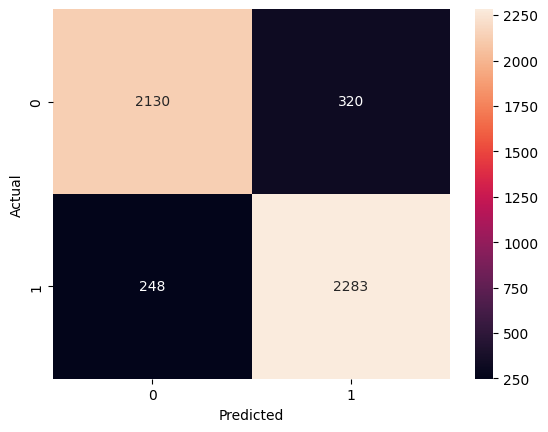

In [7]:
svm_model_best = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], kernel=grid_search.best_params_['kernel'])
svm_model_best.fit(x_train_vec, y_train)

y_pred_svm_b = svm_model_best.predict(x_test_vec)

# Calculer l'exactitude des prédictions
accuracy_svm_b = accuracy_score(y_test, y_pred_svm_b)
precision_svm_b = precision_score(y_test, y_pred_svm_b, average='macro')
recall_svm_b = recall_score(y_test, y_pred_svm_b, average='macro')
f1_score_svm_b = f1_score(y_test, y_pred_svm_b, average='macro')

print("Exactitude de SVM: ", accuracy_svm_b)
print("Précision de SVM: ", precision_svm_b)
print("Rappel de SVM: ", recall_svm_b)
print("F1 score de SVM: ", f1_score_svm_b)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm_b)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()